# Project Title : **Predicting Loan Replayment Risk**
---
## Group Number  : **Group 13**

##### Group Members : 
* **EG/2020/3990 - Jayasooriya L.P.M.   - jayasooriya_lpm_e22@engug.ruh.ac.lk**
* **EG/2020/4040 - Lakpahana A.G.S.     - lakpahana_ags_e22@engug.ruh.ac.lk**

#### keggle Dataset Link : https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

----

### **Importing Libraries**

In [1]:
#importing pandas library to read csv file and to create dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **Loading data from the csv file**

In [2]:
#creating a dataframe from the csv file
df = pd.read_csv('data/TrainingData.csv')

# Data Cleaning

#### **Checking the data from the file**

In [3]:
print(df)

            Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_

In [4]:
#checking the dataframe
df.head()

#note - looks like there are some different format values in city column
#note - looks like there are some different format values in state column ( underscores)
#note - want to check all profession has underscores or not

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


#### **Checking the shape of the dataframe**

In [6]:
#checking the shape of the dataframe. shape means number of rows and columns
df.shape

(252000, 13)

#### **Checking the data types of the columns**

In [7]:
#checking the data types of the columns
df.dtypes

#there are 6 columns with object data type. we may need to convert them to numeric data type.

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

#### **Checking the missing values in the dataframe**

In [8]:
#check for missing values
df.isnull().sum()

#there are no missing values in the dataframe,so we can proceed further

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

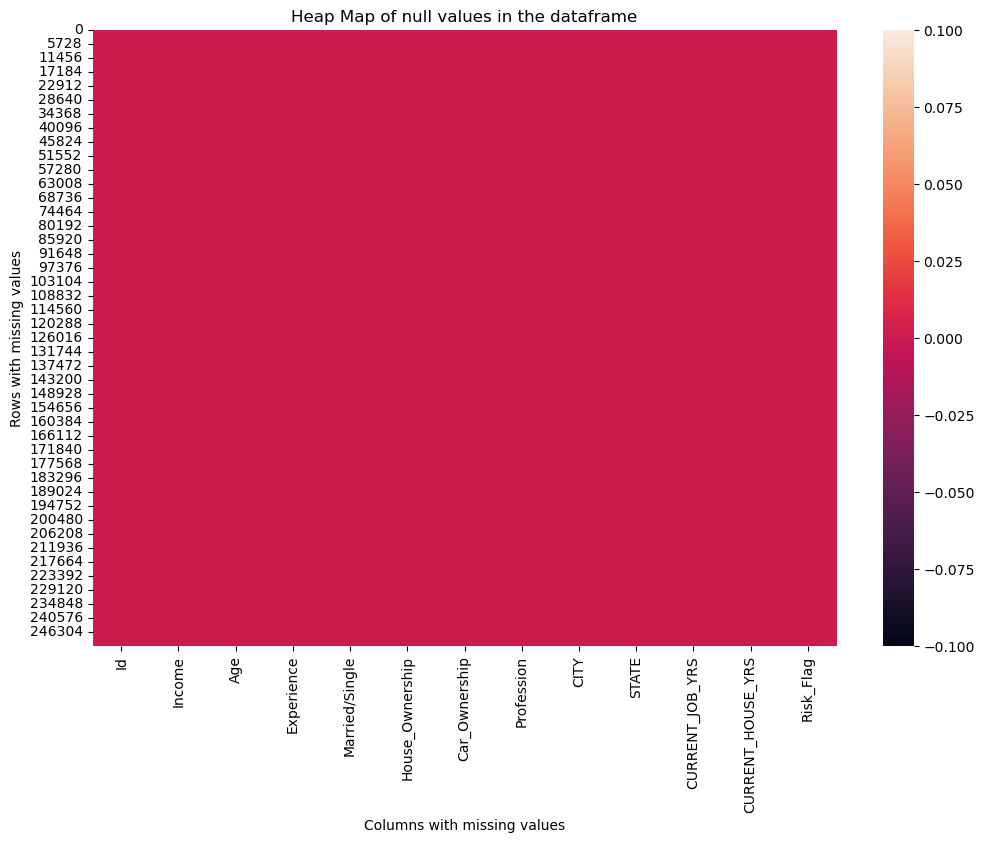

In [9]:
# Generate Heap Map to check null values
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.xlabel('Columns with missing values')
plt.ylabel('Rows with missing values')
plt.title('Heap Map of null values in the dataframe')
plt.show()
#there are no missing values in the dataframe,so we can proceed further

## **Data Analyzing**

In [10]:
#for easy access, we can rename the columns

df.columns = ['id', 'income', 'age', 'experience', 'marital_status', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'current_job_years', 'current_house_years', 'risk_flag']

#make all the data in lower case

df['marital_status'] = df['marital_status'].str.lower()
df['house_ownership'] = df['house_ownership'].str.lower()
df['car_ownership'] = df['car_ownership'].str.lower()
df['profession'] = df['profession'].str.lower()
df['city'] = df['city'].str.lower()
df['state'] = df['state'].str.lower()


df.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli[10],tamil_nadu,3,14,1


#### Analyzing the city and state features

In [11]:
#there are some unformated data in the city and state column.
# we need to format them first  before checking for duplicates
#otherwise we may get wrong results

df['city']=df['city'].str.replace(r'\[.*\]', '', regex=True)
df['state']=df['state'].str.replace(r'\[.*\]', '', regex=True)

df.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


#### Analyzing Duplicate values

In [12]:
#check for duplicate rows
df.duplicated().sum()
#no duplicate rows therefore no need to drop duplicate rows

0

In [13]:
# # heap map to check for duplicate rows
# import seaborn as sns
# plt.figure(figsize=(12,8))
# sns.heatmap(df.duplicated())
# plt.xlabel('Columns with duplicate rows')
# plt.ylabel('Rows with duplicate rows')
# plt.title('Heap Map of duplicate rows in the dataframe')
# plt.show()


In [14]:
#first we are going to remove the id column as it is not required for our analysis
df.drop('id',axis=1,inplace=True)

#checking the dataframe
df.head()


,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [15]:
#now checking the data 
df.describe()

#in here we can understand 
#1. there are no missing values in the dataframe


,income,age,experience,current_job_years,current_house_years,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


/var/folders/64/33_xdk6n4p93q_7w454zdy9h0000gn/T/ipykernel_1090/3325678273.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

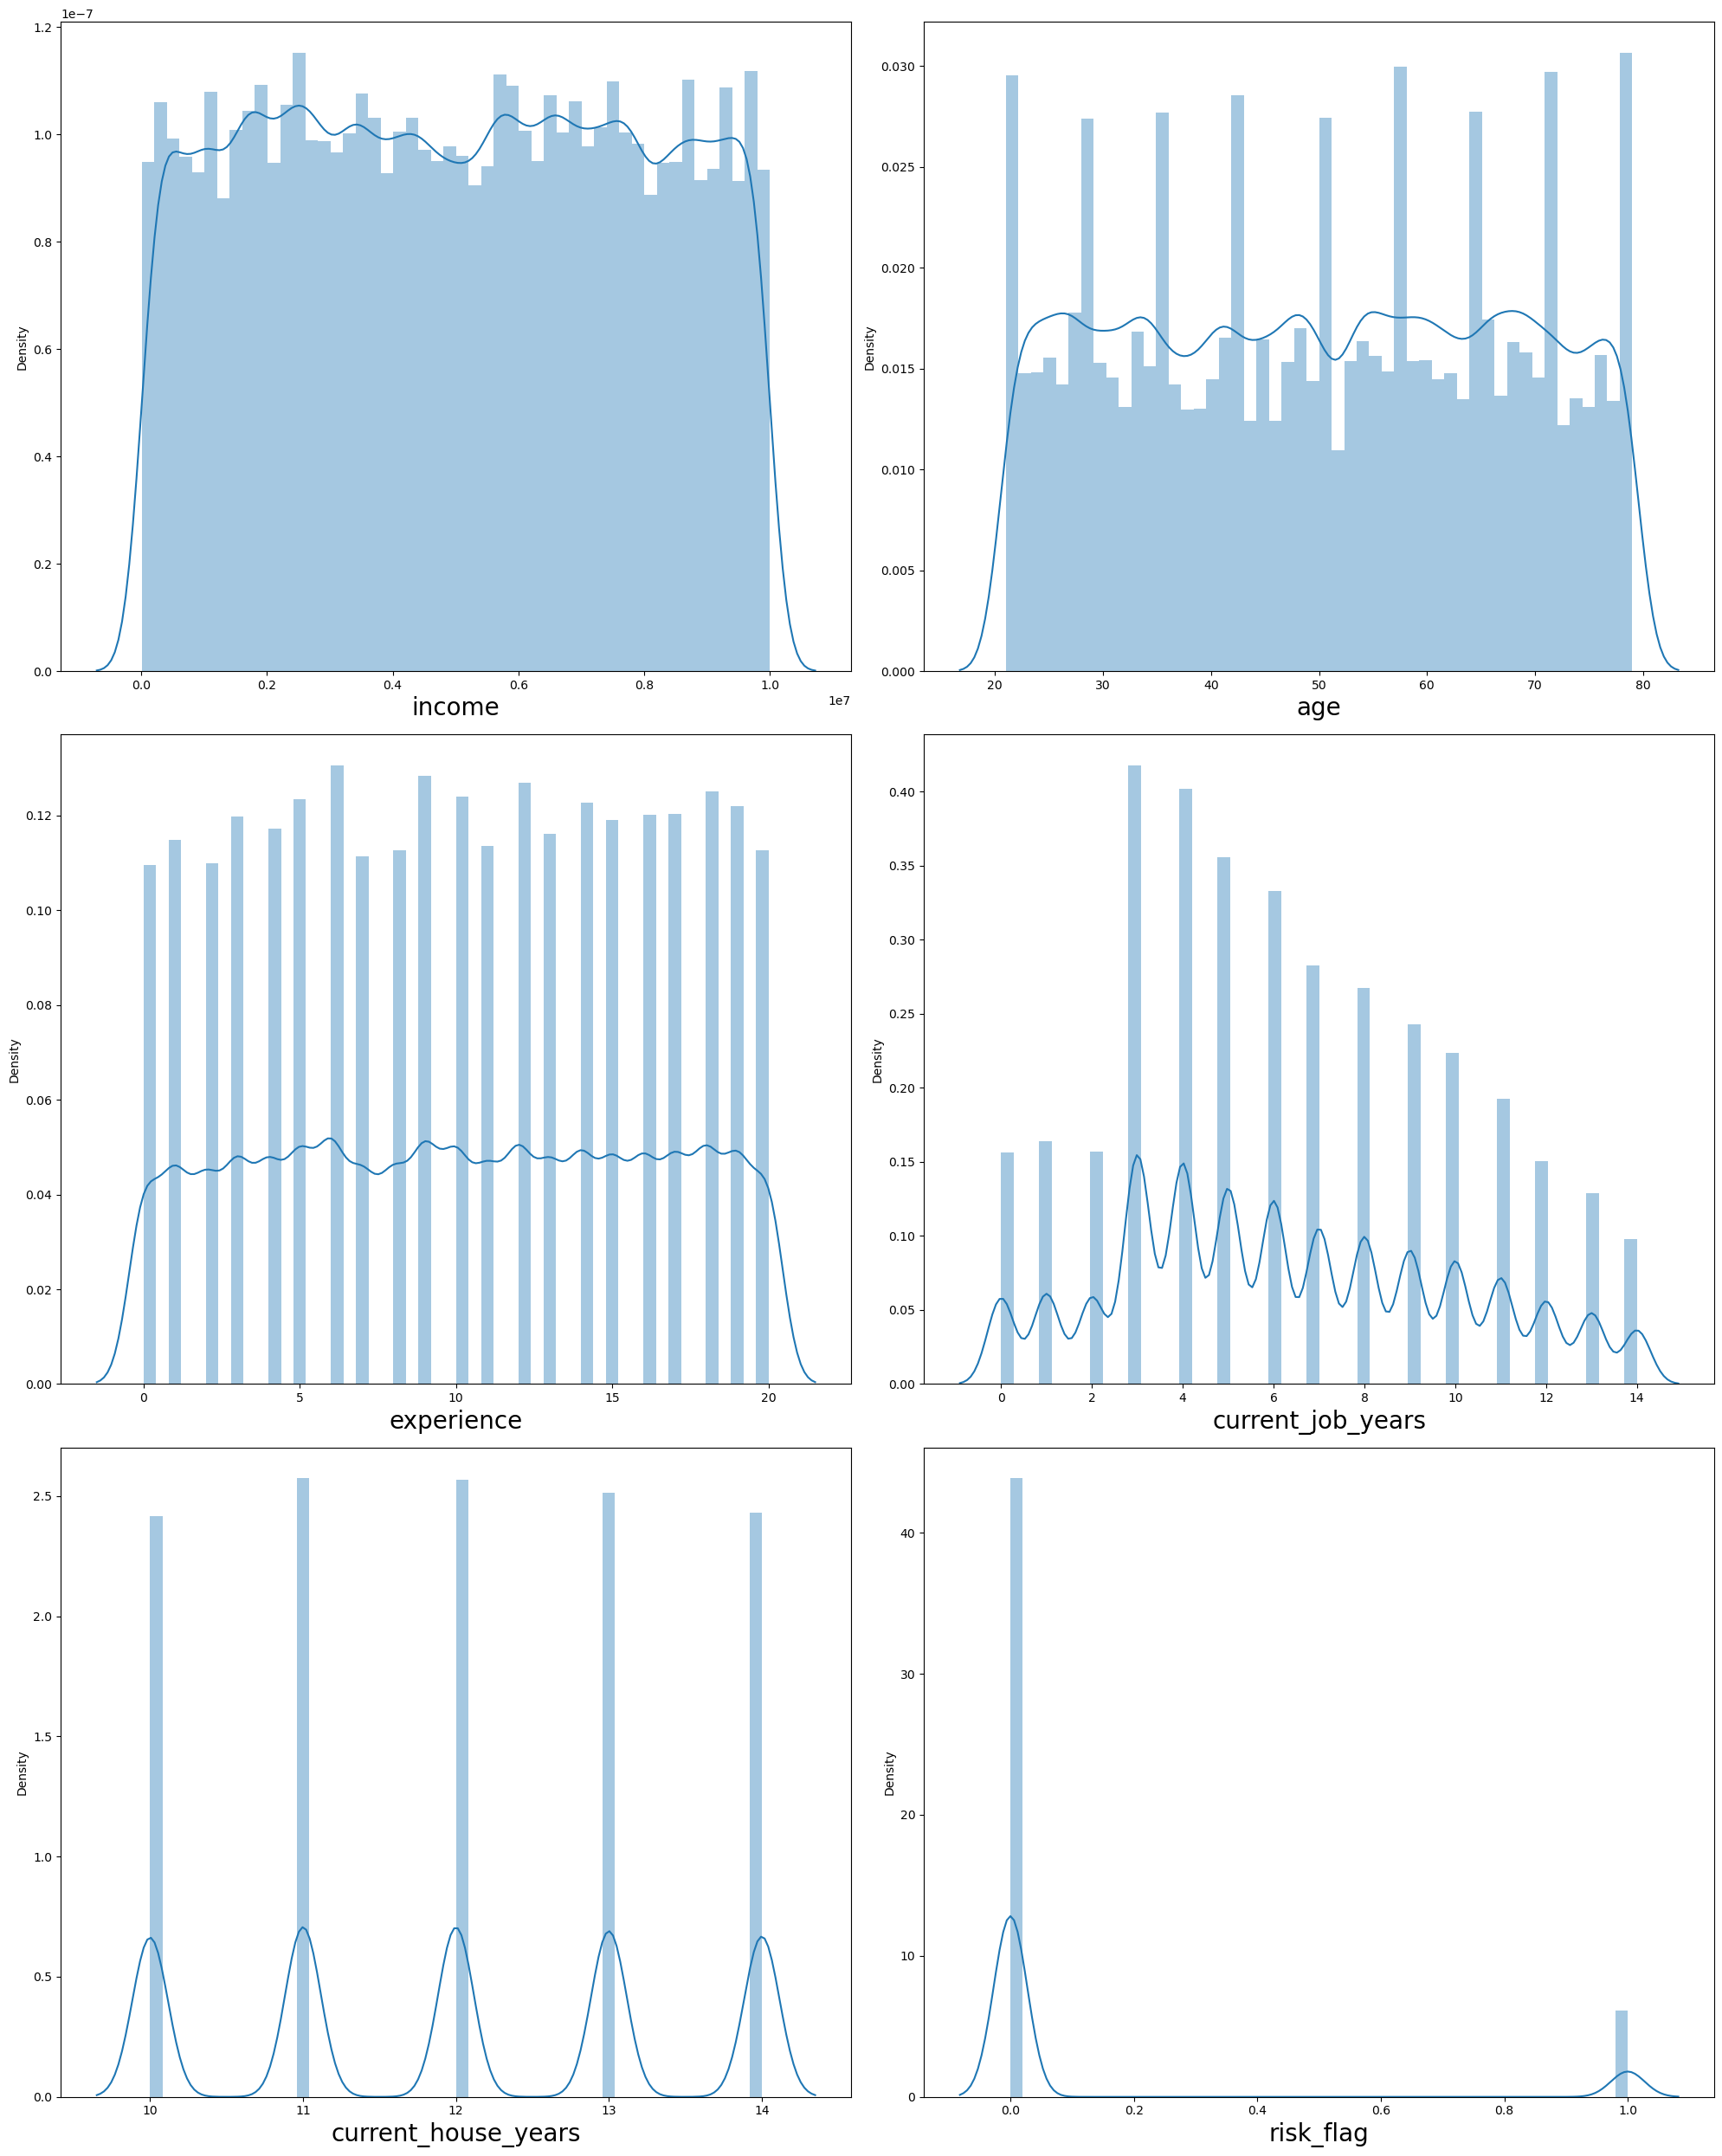

In [16]:
# lets plot all the columns to understand the data distribution
import matplotlib.pyplot as plt
import seaborn as sns

# draw distribution plot for Income	Age	Experience	CURRENT_JOB_YRS	CURRENT_HOUSE_YRS	Risk_Flag the numer columns using subplots

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
columnarray=['income','age','experience','current_job_years','current_house_years','risk_flag']
for column in columnarray:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#remove warnings
import warnings
warnings.filterwarnings('ignore')


## Data Preprocessing

### **Checking for the Outliers**

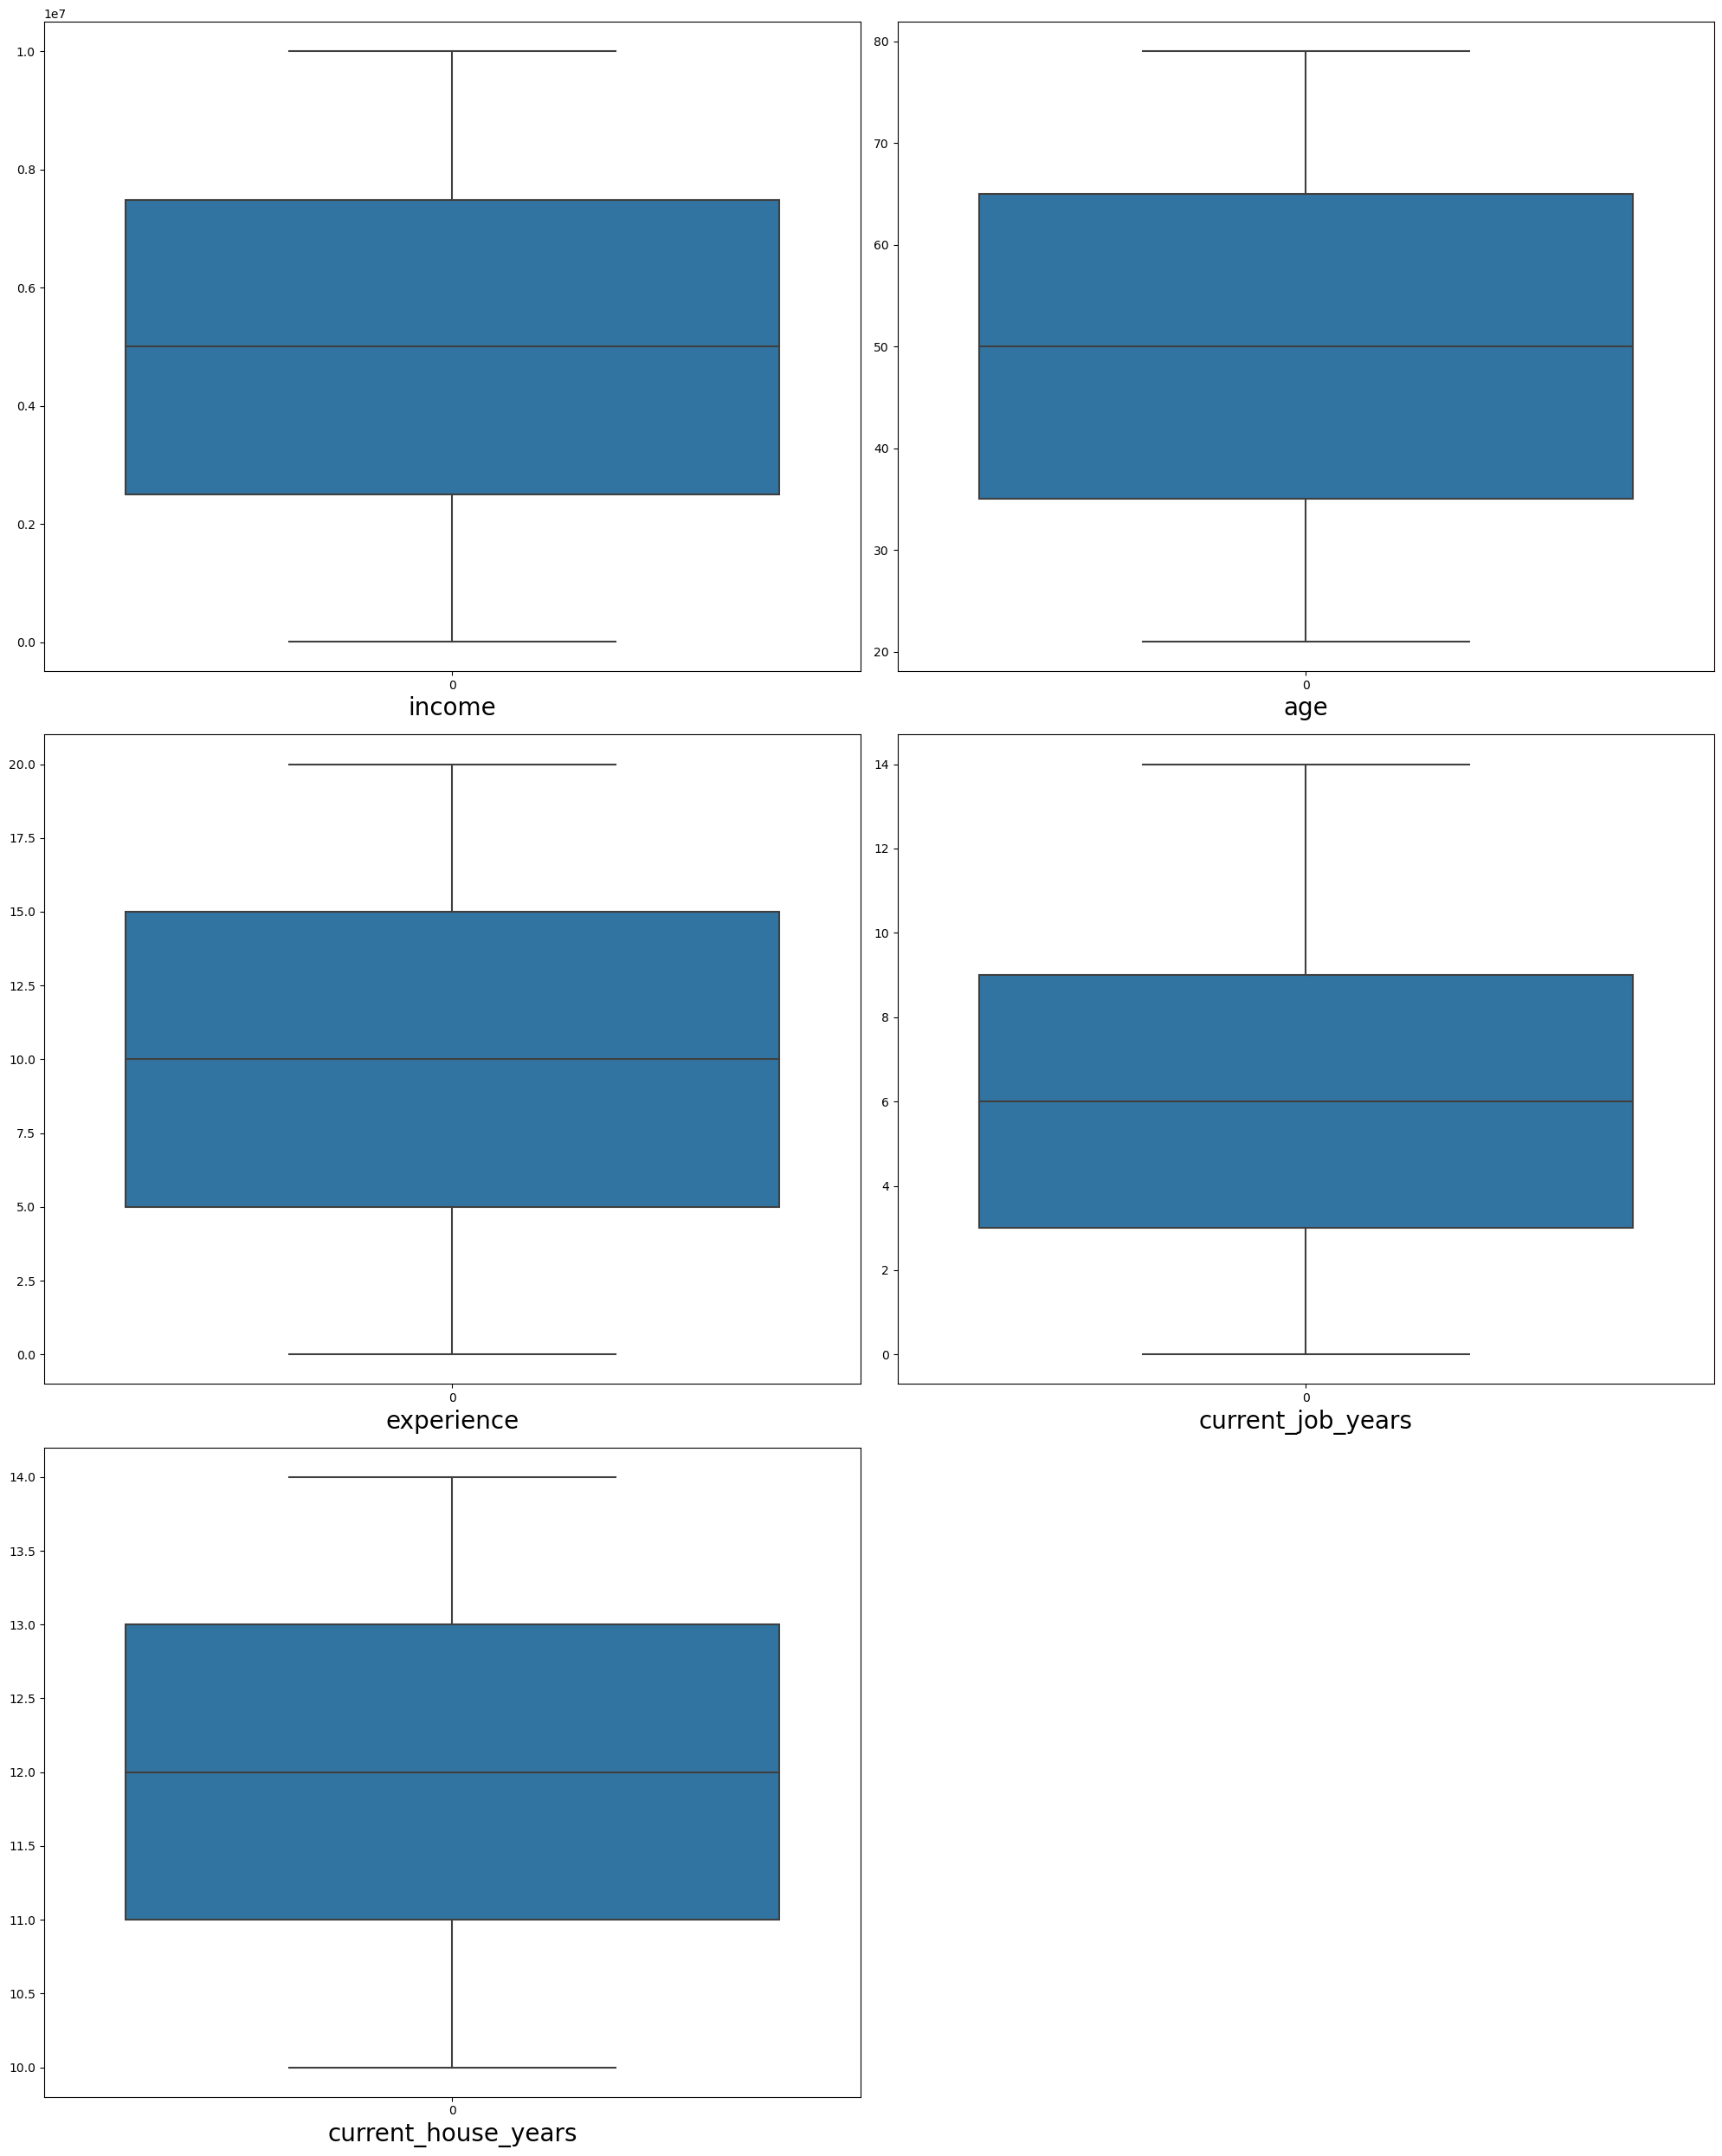

In [17]:
#there are no outliers in the data
#but risk flag is imbalanced

#checking all the columns for outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
columnarray=['income','age','experience','current_job_years','current_house_years']
for column in columnarray:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.tight_layout()

#there are no outliers in the data

# Analyse the data distribution of categorical columns

### **marital status**

In [18]:
#checking columns without numerical values

df['marital_status'].value_counts()

#note - there are 2 different values in Married/Single column. we need to convert them to numeric values
#note - we use married = 1 and single = 0
#note - we use married as 1 because sometimes it may be bias towards single as there are more single people than married people.

marital_status
single     226272
married     25728
Name: count, dtype: int64

#### Convert marital status to numeric values

In [19]:
df['marital_status'].replace({'single':0,'married':1},inplace=True)
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,0,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,1,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,0,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,0,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


### **car_ownership**

In [20]:
df['car_ownership'].value_counts()

car_ownership
no     176000
yes     76000
Name: count, dtype: int64

#### **Convert car_ownership to numeric**

In [21]:
#note - there are 2 different values in car_ownership column. we need to convert them to numeric values
#note - we use yes = 1 and no = 0
#note - we use yes as 1 because sometimes it may be bias towards no as there are more no people than yes people.

df['car_ownership'].replace({'no':0,'yes':1},inplace=True)
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,rented,0,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,0,rented,0,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,1,rented,0,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,0,rented,1,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,0,rented,0,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


## house_ownership

In [22]:
df['house_ownership'].value_counts()

#note - there are 3 different values in House_Ownership column. we need to convert them to numeric values


house_ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

#### **Convert house_ownership to numeric values**

##### **Logistic regressio - One hot encording**
##### **Decision trees - label encoding**

In [23]:
#we are going to use logistic regression and descion trees for our analysis

#for logistic regression its better to convert the categorical values to numeric values using one hot encoding 
# because it will not bias the model. this is because logistic regression is affected by the magnitude of the values.

#for decision trees its better to convert the categorical values to numeric values using label encoding because it will not bias the model. 
# this is because decision trees are not affected by the magnitude of the values ( non linear model)

#we can use one hot encoding for decision trees as well but it will increase the number of columns and it will be difficult to interpret the decision tree

#we are going to use label encoding for decision trees
#get a copy of the dataframe
df_dt=df.copy()
df_lr=df.copy()
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_dt['house_ownership']=le.fit_transform(df_dt['house_ownership'])
df_dt.head()
#we are going to use one hot encoding for logistic regression for House Ownership column


,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,0,2,0,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,1,2,0,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,0,2,1,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,0,2,0,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [24]:
df_lr=pd.get_dummies(df_lr,columns=['house_ownership'])
df_lr.head()


,income,age,experience,marital_status,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented
0,1303834,23,3,0,0,mechanical_engineer,rewa,madhya_pradesh,3,13,0,False,False,True
1,7574516,40,10,0,0,software_developer,parbhani,maharashtra,9,13,0,False,False,True
2,3991815,66,4,1,0,technical_writer,alappuzha,kerala,4,10,0,False,False,True
3,6256451,41,2,0,1,software_developer,bhubaneswar,odisha,2,12,1,False,False,True
4,5768871,47,11,0,0,civil_servant,tiruchirappalli,tamil_nadu,3,14,1,False,False,True


## city

In [25]:
#checking the city
df_lr['city'].value_counts()

city
aurangabad       1543
vijayanagaram    1259
bhopal           1208
bulandshahr      1185
saharsa          1180
                 ... 
ujjain            486
warangal          459
bettiah           457
katni             448
karaikudi         431
Name: count, Length: 316, dtype: int64

#### **Convert city to numeric values**

##### **One hot encording**

In [26]:
#for city column we are going to use one hot encoding for logistic regression and label encoding for decision trees

df_lr=pd.get_dummies(df_lr,columns=['city'])
df_lr.head()

,income,age,experience,marital_status,car_ownership,profession,state,current_job_years,current_house_years,risk_flag,...,city_unnao,city_vadodara,city_varanasi,city_vasai-virar,city_vellore,city_vijayanagaram,city_vijayawada,city_visakhapatnam,city_warangal,city_yamunanagar
0,1303834,23,3,0,0,mechanical_engineer,madhya_pradesh,3,13,0,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,0,0,software_developer,maharashtra,9,13,0,...,False,False,False,False,False,False,False,False,False,False
2,3991815,66,4,1,0,technical_writer,kerala,4,10,0,...,False,False,False,False,False,False,False,False,False,False
3,6256451,41,2,0,1,software_developer,odisha,2,12,1,...,False,False,False,False,False,False,False,False,False,False
4,5768871,47,11,0,0,civil_servant,tamil_nadu,3,14,1,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df_dt['city']=le.fit_transform(df_dt['city'])
df_dt.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,mechanical_engineer,250,madhya_pradesh,3,13,0
1,7574516,40,10,0,2,0,software_developer,226,maharashtra,9,13,0
2,3991815,66,4,1,2,0,technical_writer,8,kerala,4,10,0
3,6256451,41,2,0,2,1,software_developer,53,odisha,2,12,1
4,5768871,47,11,0,2,0,civil_servant,295,tamil_nadu,3,14,1


In [28]:
df_dt['state'].value_counts()

state
uttar_pradesh        29143
maharashtra          25562
andhra_pradesh       25297
west_bengal          23483
bihar                19780
tamil_nadu           16537
madhya_pradesh       14122
karnataka            11855
gujarat              11408
rajasthan             9174
jharkhand             8965
haryana               7890
telangana             7524
assam                 7062
kerala                5805
delhi                 5490
punjab                4720
odisha                4658
chhattisgarh          3834
uttarakhand           1874
jammu_and_kashmir     1780
puducherry            1433
manipur                849
mizoram                849
himachal_pradesh       833
tripura                809
chandigarh             656
sikkim                 608
Name: count, dtype: int64

## State
#### **Convert city to numeric values**
##### **Logistic regressio - One hot encording**
##### **Decision trees - label encoding**

In [29]:
#for state column we are going to use one hot encoding for logistic regression and label encoding for decision trees

df_lr=pd.get_dummies(df_lr,columns=['state'])
df_lr.head()

,income,age,experience,marital_status,car_ownership,profession,current_job_years,current_house_years,risk_flag,house_ownership_norent_noown,...,state_puducherry,state_punjab,state_rajasthan,state_sikkim,state_tamil_nadu,state_telangana,state_tripura,state_uttar_pradesh,state_uttarakhand,state_west_bengal
0,1303834,23,3,0,0,mechanical_engineer,3,13,0,False,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,0,0,software_developer,9,13,0,False,...,False,False,False,False,False,False,False,False,False,False
2,3991815,66,4,1,0,technical_writer,4,10,0,False,...,False,False,False,False,False,False,False,False,False,False
3,6256451,41,2,0,1,software_developer,2,12,1,False,...,False,False,False,False,False,False,False,False,False,False
4,5768871,47,11,0,0,civil_servant,3,14,1,False,...,False,False,False,False,True,False,False,False,False,False


In [30]:
df_dt['state']=le.fit_transform(df_dt['state'])
df_dt.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,mechanical_engineer,250,13,3,13,0
1,7574516,40,10,0,2,0,software_developer,226,14,9,13,0
2,3991815,66,4,1,2,0,technical_writer,8,12,4,10,0
3,6256451,41,2,0,2,1,software_developer,53,17,2,12,1
4,5768871,47,11,0,2,0,civil_servant,295,22,3,14,1


## profession
#### **Convert profession to numeric values**
##### **Logistic regressio - One hot encording**
##### **Decision trees - label encoding**

In [31]:
df_dt['profession'].value_counts()

profession
physician                     5957
statistician                  5806
web_designer                  5397
psychologist                  5390
computer_hardware_engineer    5372
drafter                       5359
magistrate                    5357
fashion_designer              5304
air_traffic_controller        5281
comedian                      5259
industrial_engineer           5250
mechanical_engineer           5217
chemical_engineer             5205
technical_writer              5195
hotel_manager                 5178
financial_analyst             5167
graphic_designer              5166
flight_attendant              5128
biomedical_engineer           5127
secretary                     5061
software_developer            5053
petroleum_engineer            5041
police_officer                5035
computer_operator             4990
politician                    4944
microbiologist                4881
technician                    4864
artist                        4861
lawyer   

In [32]:
df_dt['profession']=le.fit_transform(df_dt['profession'])
df_dt.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,33,250,13,3,13,0
1,7574516,40,10,0,2,0,43,226,14,9,13,0
2,3991815,66,4,1,2,0,47,8,12,4,10,0
3,6256451,41,2,0,2,1,43,53,17,2,12,1
4,5768871,47,11,0,2,0,11,295,22,3,14,1


In [33]:
df_lr=pd.get_dummies(df_lr,columns=['profession'])
df_lr.head()

,income,age,experience,marital_status,car_ownership,current_job_years,current_house_years,risk_flag,house_ownership_norent_noown,house_ownership_owned,...,profession_scientist,profession_secretary,profession_software_developer,profession_statistician,profession_surgeon,profession_surveyor,profession_technical_writer,profession_technician,profession_technology_specialist,profession_web_designer
0,1303834,23,3,0,0,3,13,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,0,0,9,13,0,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3991815,66,4,1,0,4,10,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,6256451,41,2,0,1,2,12,1,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5768871,47,11,0,0,3,14,1,False,False,...,False,False,False,False,False,False,False,False,False,False


## Correlation Matrix  - Heatmap  

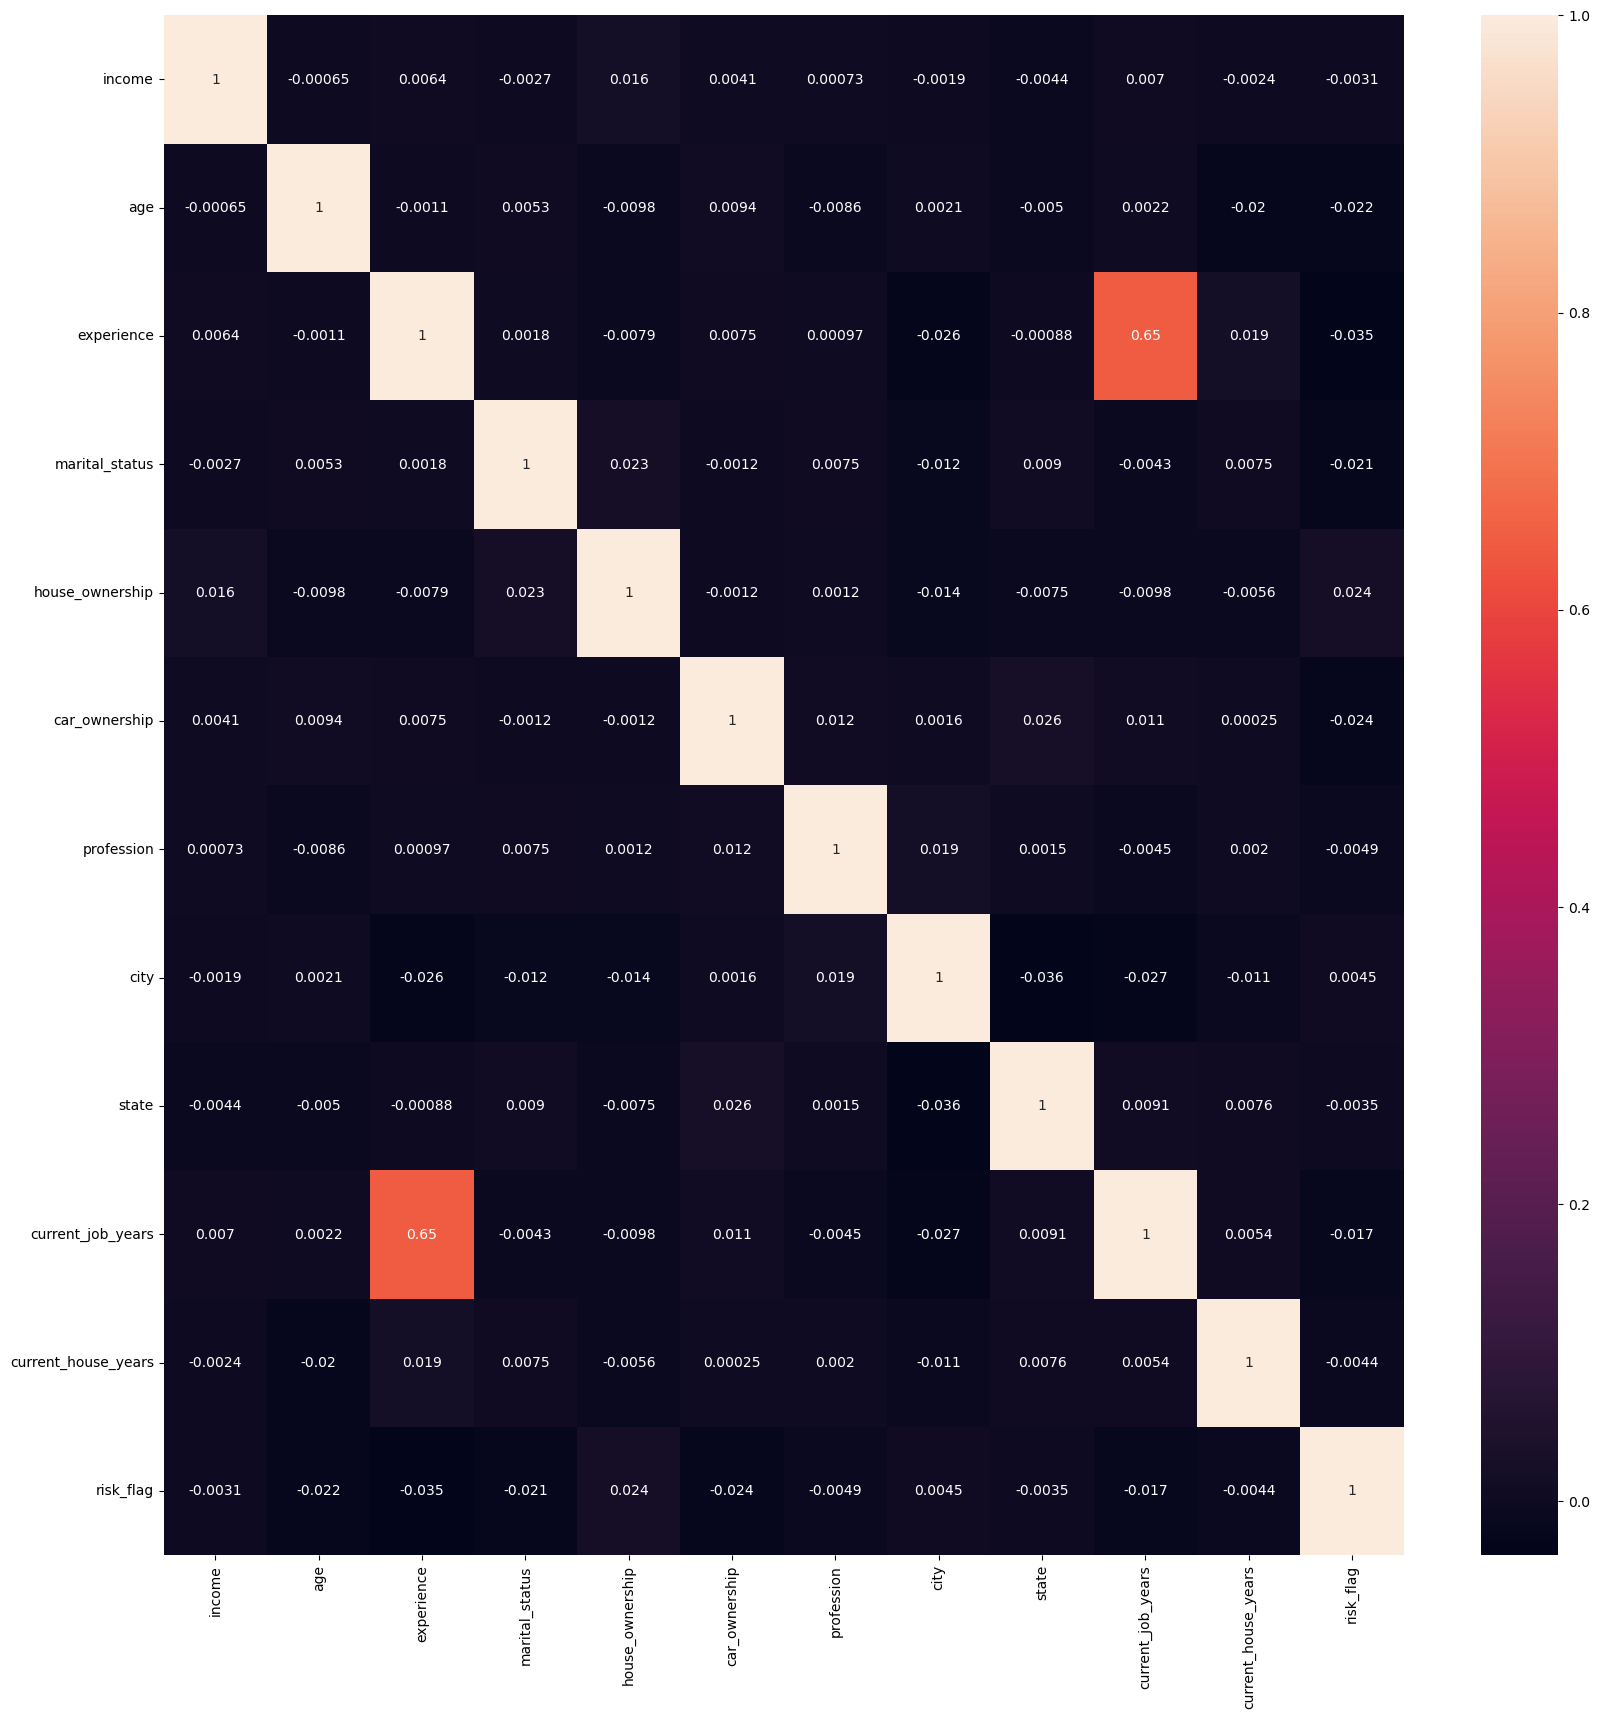

In [34]:
#now we have converted all the categorical values to numeric values
#now we can proceed to check for multicollinearity
#lets check the correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(df_dt.corr(),annot=True)
plt.show()

# we can understand In summary, the risk_flag variable shows very weak correlations with 
# all the other variables in your dataset. 
# The strongest correlations are with experience, age, and car_ownership
# but these are linear correlations. there may be non linear correlations as well

## Trainning the Model

### Split data into train and test

In [35]:
df_train=df_dt.copy()
from sklearn.model_selection import train_test_split
X, y = df_train.drop ('risk_flag', axis=1).values , df_train.risk_flag.values
X_train, X_test, y_train, y_test = train_test_split ( X, y,

                                                     test_size = 0.3,
                                                     random_state = 1,
                                                     stratify = y)

## **Handle imbalance Data**

### visualizing the target variable before oversampling of the minority class

In [36]:
from imblearn.over_sampling import SMOTE
import numpy as np

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [154703  21697]


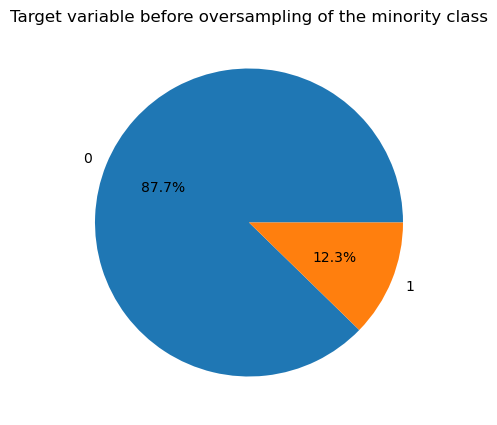

In [37]:
#visualize the target variable before oversampling of the minority class pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(np.bincount (y_train),labels=['0','1'],autopct='%1.1f%%')
plt.title('Target variable before oversampling of the minority class')
plt.show()


### visualizing the target variable after oversampling of the minority class

In [38]:
smt = SMOTE ()
X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )


Number of observations in the target variable after oversampling of the minority class: [154703 154703]


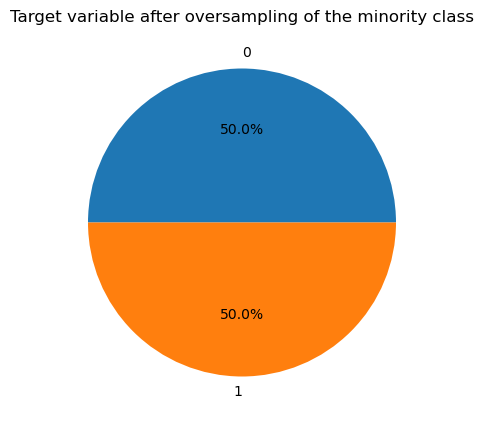

In [39]:
# visualize the target variable distribution after oversampling pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(np.bincount (y_train),labels=['0','1'],autopct='%1.1f%%')
plt.title('Target variable after oversampling of the minority class')
plt.show()


### Visualize imbalance data

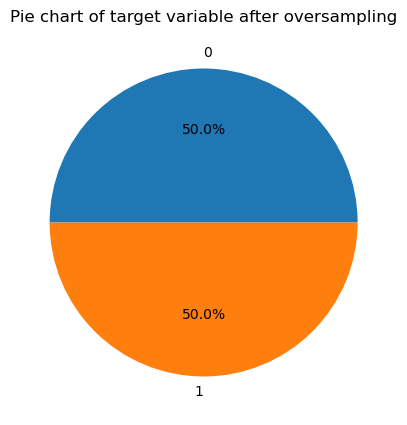

In [40]:
# visualizing the imbalance data in pie chart
plt.figure(figsize=(5,5))
plt.pie(np.bincount(y_train),labels=['0','1'],autopct='%1.1f%%')
plt.title('Pie chart of target variable after oversampling')
plt.show()

### **Standalization**

In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

### **Accuracy Score and Roc_Auc Score**

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


tree = DecisionTreeClassifier ( random_state = 1 )
tree.fit ( X_train_std, y_train )
y_pred = tree.predict ( X_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred ) )


Accuracy score: 0.87
Roc_Auc score: 0.86


In [43]:
#lets check the confusion matrix
print(confusion_matrix(y_test,y_pred))

#lets check the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


[[57486  8815]
 [ 1374  7925]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66301
           1       0.47      0.85      0.61      9299

    accuracy                           0.87     75600
   macro avg       0.73      0.86      0.76     75600
weighted avg       0.91      0.87      0.88     75600



### Visualize the confusion matrix for Decition tree

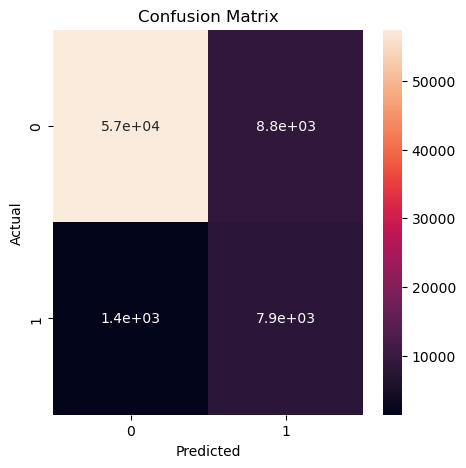

In [44]:
#visualizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# HyperParameter Optimization

### **Grid Search CV**

In [45]:

from sklearn.model_selection import GridSearchCV
# range of parameter values
split_range = [ 8, 10 ]
# parameters grid
grid_param = [
    { 'criterion' : [ 'entropy', 'gini' ],
     'splitter' : [ 'best', 'random' ],
     'min_samples_split' : split_range }
]
gs = GridSearchCV ( estimator = tree,
                   param_grid = grid_param,
                   scoring = 'roc_auc',
                   cv = 3,
                   refit = True,
                   n_jobs = 4
                   )

gs = gs.fit ( X_train, y_train )

print ( 'Best hyperparameter:', gs.best_params_ )
print ( 'Best score: %.3f' %gs.best_score_ )

gs = gs.best_estimator_

Best hyperparameter: {'criterion': 'entropy', 'min_samples_split': 10, 'splitter': 'random'}
Best score: 0.919


### After HyperParameter Optimization - Decision Tree

#### **Accuracy Score and Roc_Auc Score**

In [46]:

gs.fit ( X_train_std, y_train )
y_pred_gs = gs.predict ( X_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred_gs ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred_gs ) )


Accuracy score: 0.86
Roc_Auc score: 0.86


#### **Visualize the confusion matrix and classification report for Decition tree**

In [47]:
#lets check the confusion matrix
print(confusion_matrix(y_test,y_pred_gs))
print(classification_report(y_test,y_pred_gs))

[[57363  8938]
 [ 1336  7963]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66301
           1       0.47      0.86      0.61      9299

    accuracy                           0.86     75600
   macro avg       0.72      0.86      0.76     75600
weighted avg       0.91      0.86      0.88     75600



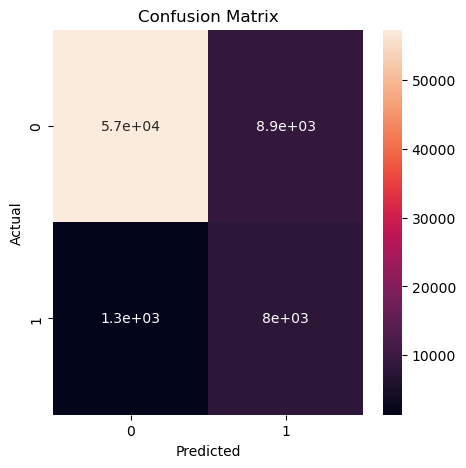

In [48]:
#visualizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred_gs),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

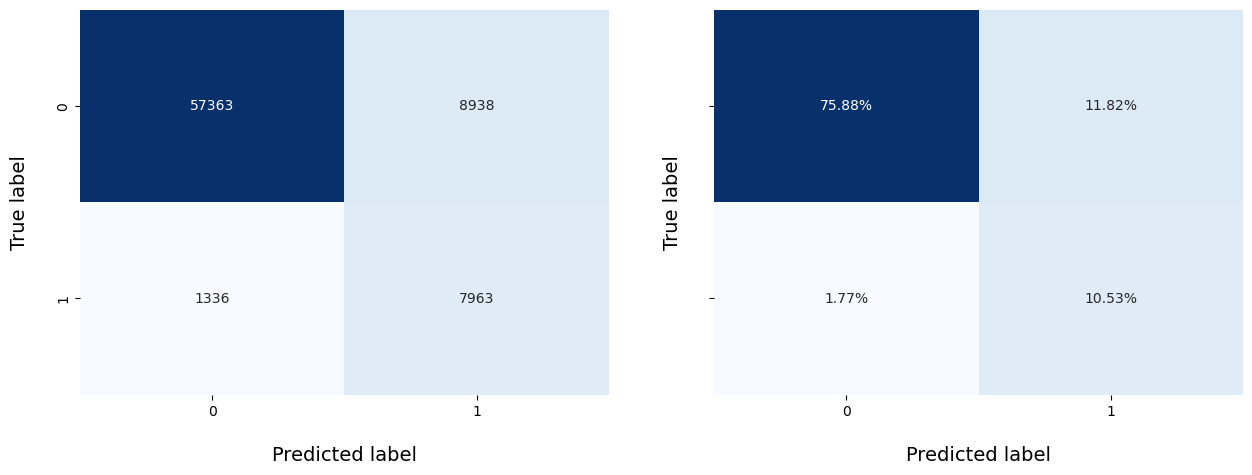

In [49]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (  y_test, y_pred_gs )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()


In [50]:

from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve ( gs,
                                                            X_train_std,
                                                            y_train,
                                                            cv = 5,
                                                            scoring = 'accuracy',
                                                            n_jobs = -1,
                                                            train_sizes = np.linspace ( 0.01, 1, 50 ),
                                                            verbose = 1 )

train_mean = np.mean ( train_scores, axis = 1 )

train_std = np.std ( train_scores, axis = 1 )

test_mean = np.mean ( test_scores, axis = 1 )

test_std = np.std ( test_scores, axis = 1 )

#hide warnings
import warnings
warnings.filterwarnings('ignore')


[learning_curve] Training set sizes: [  2475   7476  12477  17478  22479  27480  32481  37482  42483  47484
  52485  57486  62487  67488  72489  77490  82491  87492  92493  97494
 102495 107496 112497 117498 122499 127500 132501 137502 142503 147504
 152505 157506 162507 167508 172509 177510 182511 187512 192513 197514
 202515 207516 212517 217518 222519 227520 232521 237522 242523 247524]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.4s finished


## Visualize the learning curve

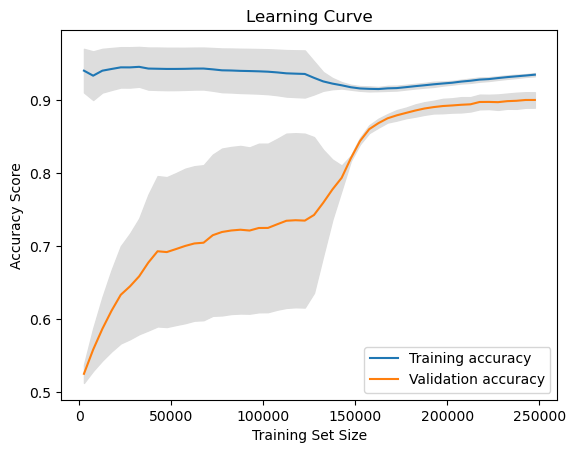

In [51]:
plt.plot ( train_sizes, train_mean, label = 'Training accuracy' )

plt.plot ( train_sizes, test_mean, label = 'Validation accuracy' )

plt.fill_between ( train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD' )

plt.fill_between ( train_sizes, test_mean - test_std, test_mean + test_std, color = '#DDDDDD' )

plt.title ( 'Learning Curve' )

plt.xlabel ( 'Training Set Size' )

plt.ylabel ( 'Accuracy Score' )

plt.legend ( loc = 'best' )

plt.show ()


# Logistic Regression

## Training the model

### Split the data into train and test sets

In [52]:
df_train=df_lr.copy()
from sklearn.model_selection import train_test_split
X, y = df_train.drop ('risk_flag', axis=1).values , df_train.risk_flag.values
X_train, X_test, y_train, y_test = train_test_split ( X, y,
                                                     test_size = 0.3,
                                                     random_state = 1,
                                                     stratify = y)


### Checking the imbalance in the target variable

In [53]:
from imblearn.over_sampling import SMOTE
import numpy as np

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )


Number of observations in the target variable before oversampling of the minority class: [154703  21697]


#### Visualize the target variable distribution before oversampling

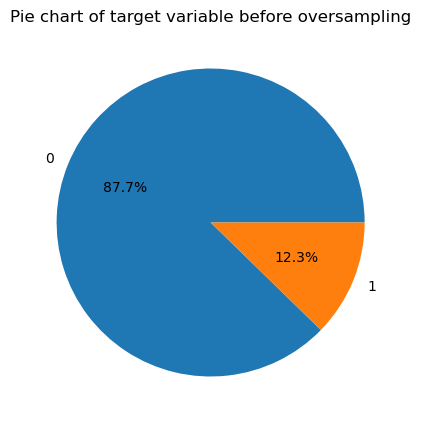

In [54]:
## Visualize the target variable distribution before oversampling in pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(np.bincount(y_train),labels=['0','1'],autopct='%1.1f%%')
plt.title('Pie chart of target variable before oversampling')
plt.show()

### Handling the imbalance data using SMOTE

In [55]:
smt = SMOTE ()

X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )


Number of observations in the target variable after oversampling of the minority class: [154703 154703]


### Visualize the target variable distribution after oversampling in pie chart

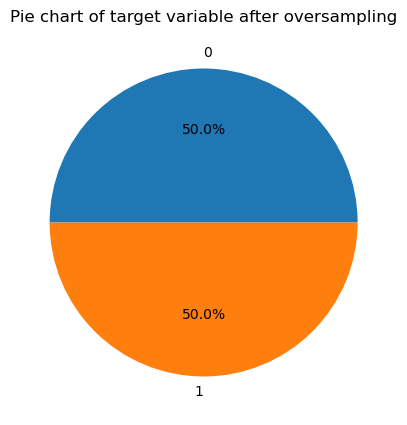

In [56]:
### Visualize the target variable distribution after oversampling in pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(np.bincount(y_train),labels=['0','1'],autopct='%1.1f%%')
plt.title('Pie chart of target variable after oversampling')
plt.show()

## Standardize the data

In [57]:

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_std = std_scaler.fit_transform ( X_train )

X_test_std = std_scaler.transform ( X_test )

## Model Training

In [58]:
# logistic regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression ( penalty = 'l2',
                            C = 1.0,
                            solver = 'liblinear',
                            random_state = 1 )

lr.fit ( X_train_std, y_train )

y_pred = lr.predict ( X_test_std )

print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred ) )




Accuracy score: 0.58
Roc_Auc score: 0.59


## Visualize the confusion matrix and classification report for Logistic Regression

In [59]:
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[37968 28333]
 [ 3587  5712]]
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     66301
           1       0.17      0.61      0.26      9299

    accuracy                           0.58     75600
   macro avg       0.54      0.59      0.48     75600
weighted avg       0.82      0.58      0.65     75600



### Visualize the confusion matrix

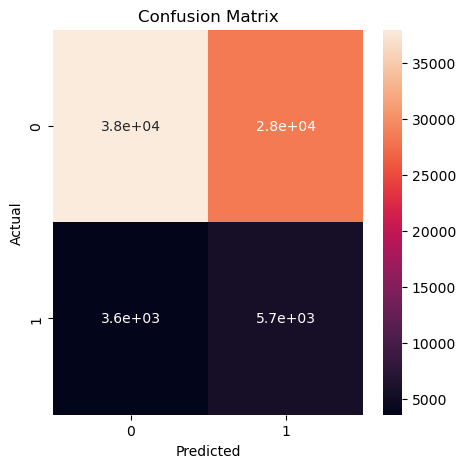

In [84]:
### Visualize the confusion matrix by indication precentage
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Hyperparameter Optimization

## Randomized Search CV

In [61]:
#hyperparameter tuning for logistic regression model using random search cv
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

# range of parameter values

C_range = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0 ]

penalty_options = [ 'l1', 'l2' ]

solver_options = [ 'liblinear', 'saga' ]

# parameters grid

grid_param = [
    { 'penalty' : penalty_options,
     'C' : C_range,
     'solver' : solver_options }
]

rs = RandomizedSearchCV ( estimator = lr,
                         param_distributions = grid_param,
                         scoring = 'roc_auc',
                         cv = 3,
                         refit = True,
                         n_jobs = 4,
                         n_iter = 10,
                         random_state = 1
                         )

rs = rs.fit ( X_train_std, y_train )
print ( 'Best hyperparameter:', rs.best_params_ )
print ( 'Best score: %.3f' %rs.best_score_ )
rs = rs.best_estimator_

import warnings
warnings.filterwarnings('ignore')


/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Best hyperparameter: {'solver': 'saga', 'penalty': 'l1', 'C': 1.0}
Best score: 0.639


## Visualize the confusion matrix and classification report for Logistic Regression after hyperparameter optimization

In [62]:
rs.fit ( X_train_std, y_train )

y_pred_rs = rs.predict ( X_test_std )

print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred_rs ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred_rs ) )
print(confusion_matrix(y_test,y_pred_rs))
print(classification_report(y_test,y_pred_rs))


Accuracy score: 0.58
Roc_Auc score: 0.59
[[37968 28333]
 [ 3587  5712]]
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     66301
           1       0.17      0.61      0.26      9299

    accuracy                           0.58     75600
   macro avg       0.54      0.59      0.48     75600
weighted avg       0.82      0.58      0.65     75600



### Visualize the confusion matrix

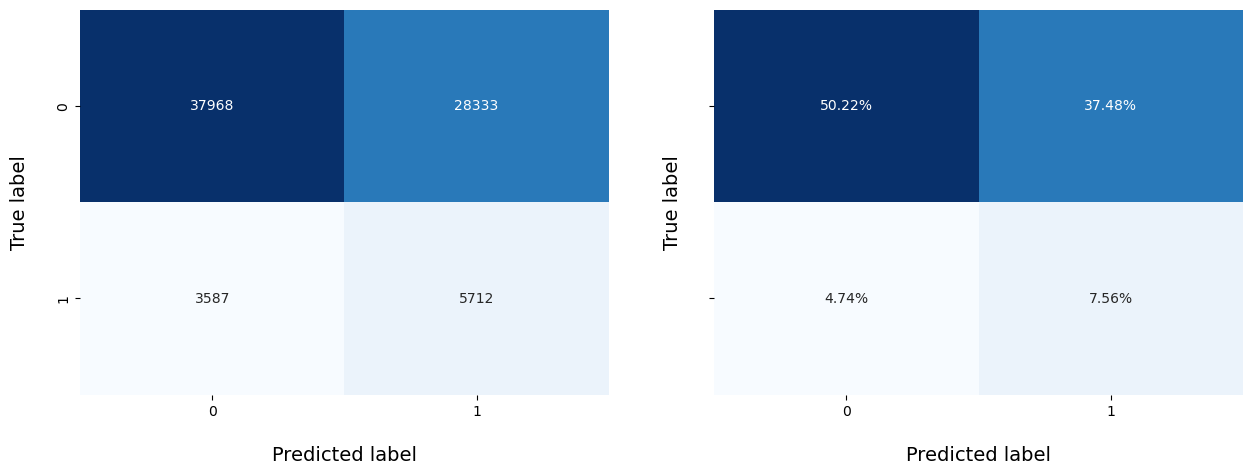

In [63]:

#plotting the confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix (  y_test, y_pred_rs )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#plot 1

sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')

axes[0].set_xlabel('\nPredicted label', size = 14)

axes[0].set_ylabel('True label\n', size = 14)

# plot 2

sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True,
            
            fmt='.2%', cmap='Blues', cbar=False)

axes[1].set_xlabel('\nPredicted label', size = 14)

axes[1].set_ylabel('True label\n', size = 14)

axes[1].yaxis.tick_left()

plt.show()




## Visualize the  Precision-Recall Curve vs Threshold Chart for Logistic Regression

(0.0, 1.0)

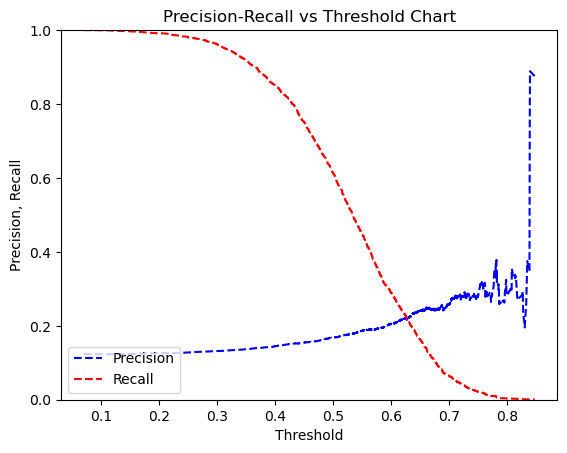

In [64]:
test_x = X_test_std
pred_y=rs.predict(test_x)

from sklearn import metrics

probs_y=rs.predict_proba(test_x) 

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")

plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [65]:
#change threshold to 0.5

threshold = 0.64
pred_y = np.where(rs.predict_proba(test_x)[:,1] > threshold, 1, 0)

print(confusion_matrix(y_test,pred_y))

print(classification_report(y_test,pred_y))


[[60521  5780]
 [ 7541  1758]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     66301
           1       0.23      0.19      0.21      9299

    accuracy                           0.82     75600
   macro avg       0.56      0.55      0.55     75600
weighted avg       0.81      0.82      0.82     75600



## Visualize the Confusion Matrix and Classification Report for Logistic Regression after Hyperparameter Optimization

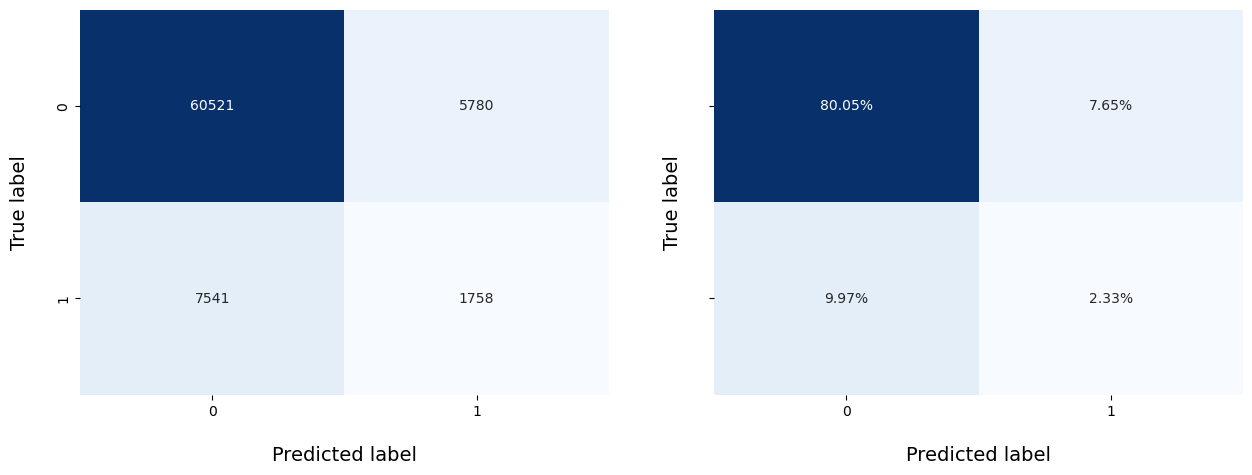

In [66]:
# draw confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix (  y_test, pred_y )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#plot 1

sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')

axes[0].set_xlabel('\nPredicted label', size = 14)

axes[0].set_ylabel('True label\n', size = 14)

# plot 2

sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True,
            
            fmt='.2%', cmap='Blues', cbar=False)

axes[1].set_xlabel('\nPredicted label', size = 14)

axes[1].set_ylabel('True label\n', size = 14)

axes[1].yaxis.tick_left()

plt.show()


## Cross-Validation for Logistic Regression and Decision Tree

In [86]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are your training data and labels
# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=None, shuffle=True) 

# Logistic Regression with Cross-Validation
logreg = LogisticRegression()
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=kf)
print("Logistic Regression - Cross-Validation Scores:", logreg_cv_scores)
print("Average Score:", logreg_cv_scores.mean())

# Decision Tree with Cross-Validation
dtree = DecisionTreeClassifier()
dtree_cv_scores = cross_val_score(dtree, X_train, y_train, cv=kf)
print("Decision Tree - Cross-Validation Scores:", dtree_cv_scores)
print("Mean Accuracy:", dtree_cv_scores.mean())


Logistic Regression - Cross-Validation Scores: [0.49768915 0.50390265 0.4999596  0.49873144 0.4997172 ]
Average Score: 0.500000007468689
Decision Tree - Cross-Validation Scores: [0.92837982 0.92854026 0.9265849  0.92824938 0.92695658]
Average Score: 0.9277421878126738


## Visualizing the Learning Curve for Logistic Regression

In [67]:
# learning curve

from sklearn.model_selection import learning_curve

import numpy as np

train_sizes, train_scores, test_scores = learning_curve ( rs,
                                                            X_train_std,
                                                            y_train,
                                                            cv = 5,
                                                            scoring = 'roc_auc',
                                                            n_jobs = -1,
                                                            train_sizes = np.linspace ( 0.01, 1, 50 ),
                                                            verbose = 1 )

train_mean = np.mean ( train_scores, axis = 1 ) 
train_std = np.std ( train_scores, axis = 1 )
test_mean = np.mean ( test_scores, axis = 1 )
test_std = np.std ( test_scores, axis = 1 ) 

#hide warnings
import warnings
warnings.filterwarnings('ignore')


[learning_curve] Training set sizes: [  2475  29702  56930  84158 111385 138613 165841 193068 220296 247524]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: 

In [ ]:
plt.plot ( train_sizes, train_mean, label = 'Training accuracy' )
plt.plot ( train_sizes, test_mean, label = 'Validation accuracy' )
plt.fill_between ( train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD' )
plt.fill_between ( train_sizes, test_mean - test_std, test_mean + test_std, color = '#DDDDDD' )

plt.title ( 'Learning Curve' )
plt.xlabel ( 'Training Set Size' )
plt.ylabel ( 'Accuracy Score' )
plt.legend ( loc = 'best' )
plt.show ()
